In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv("wheet_train.csv")
test = pd.read_csv("wheet_test.csv")

In [3]:
train.head()

,ID,area,perimeter,compactness,kernelLength,kernelWidth,asymmetryCoefficient,kernelGrooveLength.,Type
0,1,18.59,16.05,0.9066,6.037,3.860,6.001,5.877,2
1,2,11.18,12.72,0.8680,5.009,2.810,4.051,4.828,3
2,3,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,2
3,4,15.38,14.90,0.8706,5.884,3.268,4.462,5.795,2
4,5,19.15,16.45,0.8890,6.245,3.815,3.084,6.185,2


In [4]:
test.head()

,ID,area,perimeter,compactness,kernelLength,kernelWidth,asymmetryCoefficient,kernelGrooveLength.
0,1,18.85,16.17,0.9056,6.152,3.806,2.843,6.200
1,2,11.34,12.87,0.8596,5.053,2.849,3.347,5.003
2,3,14.86,14.67,0.8676,5.678,3.258,2.129,5.351
3,4,12.67,13.32,0.8977,4.984,3.135,2.300,4.745
4,5,11.82,13.40,0.8274,5.314,2.777,4.471,5.178


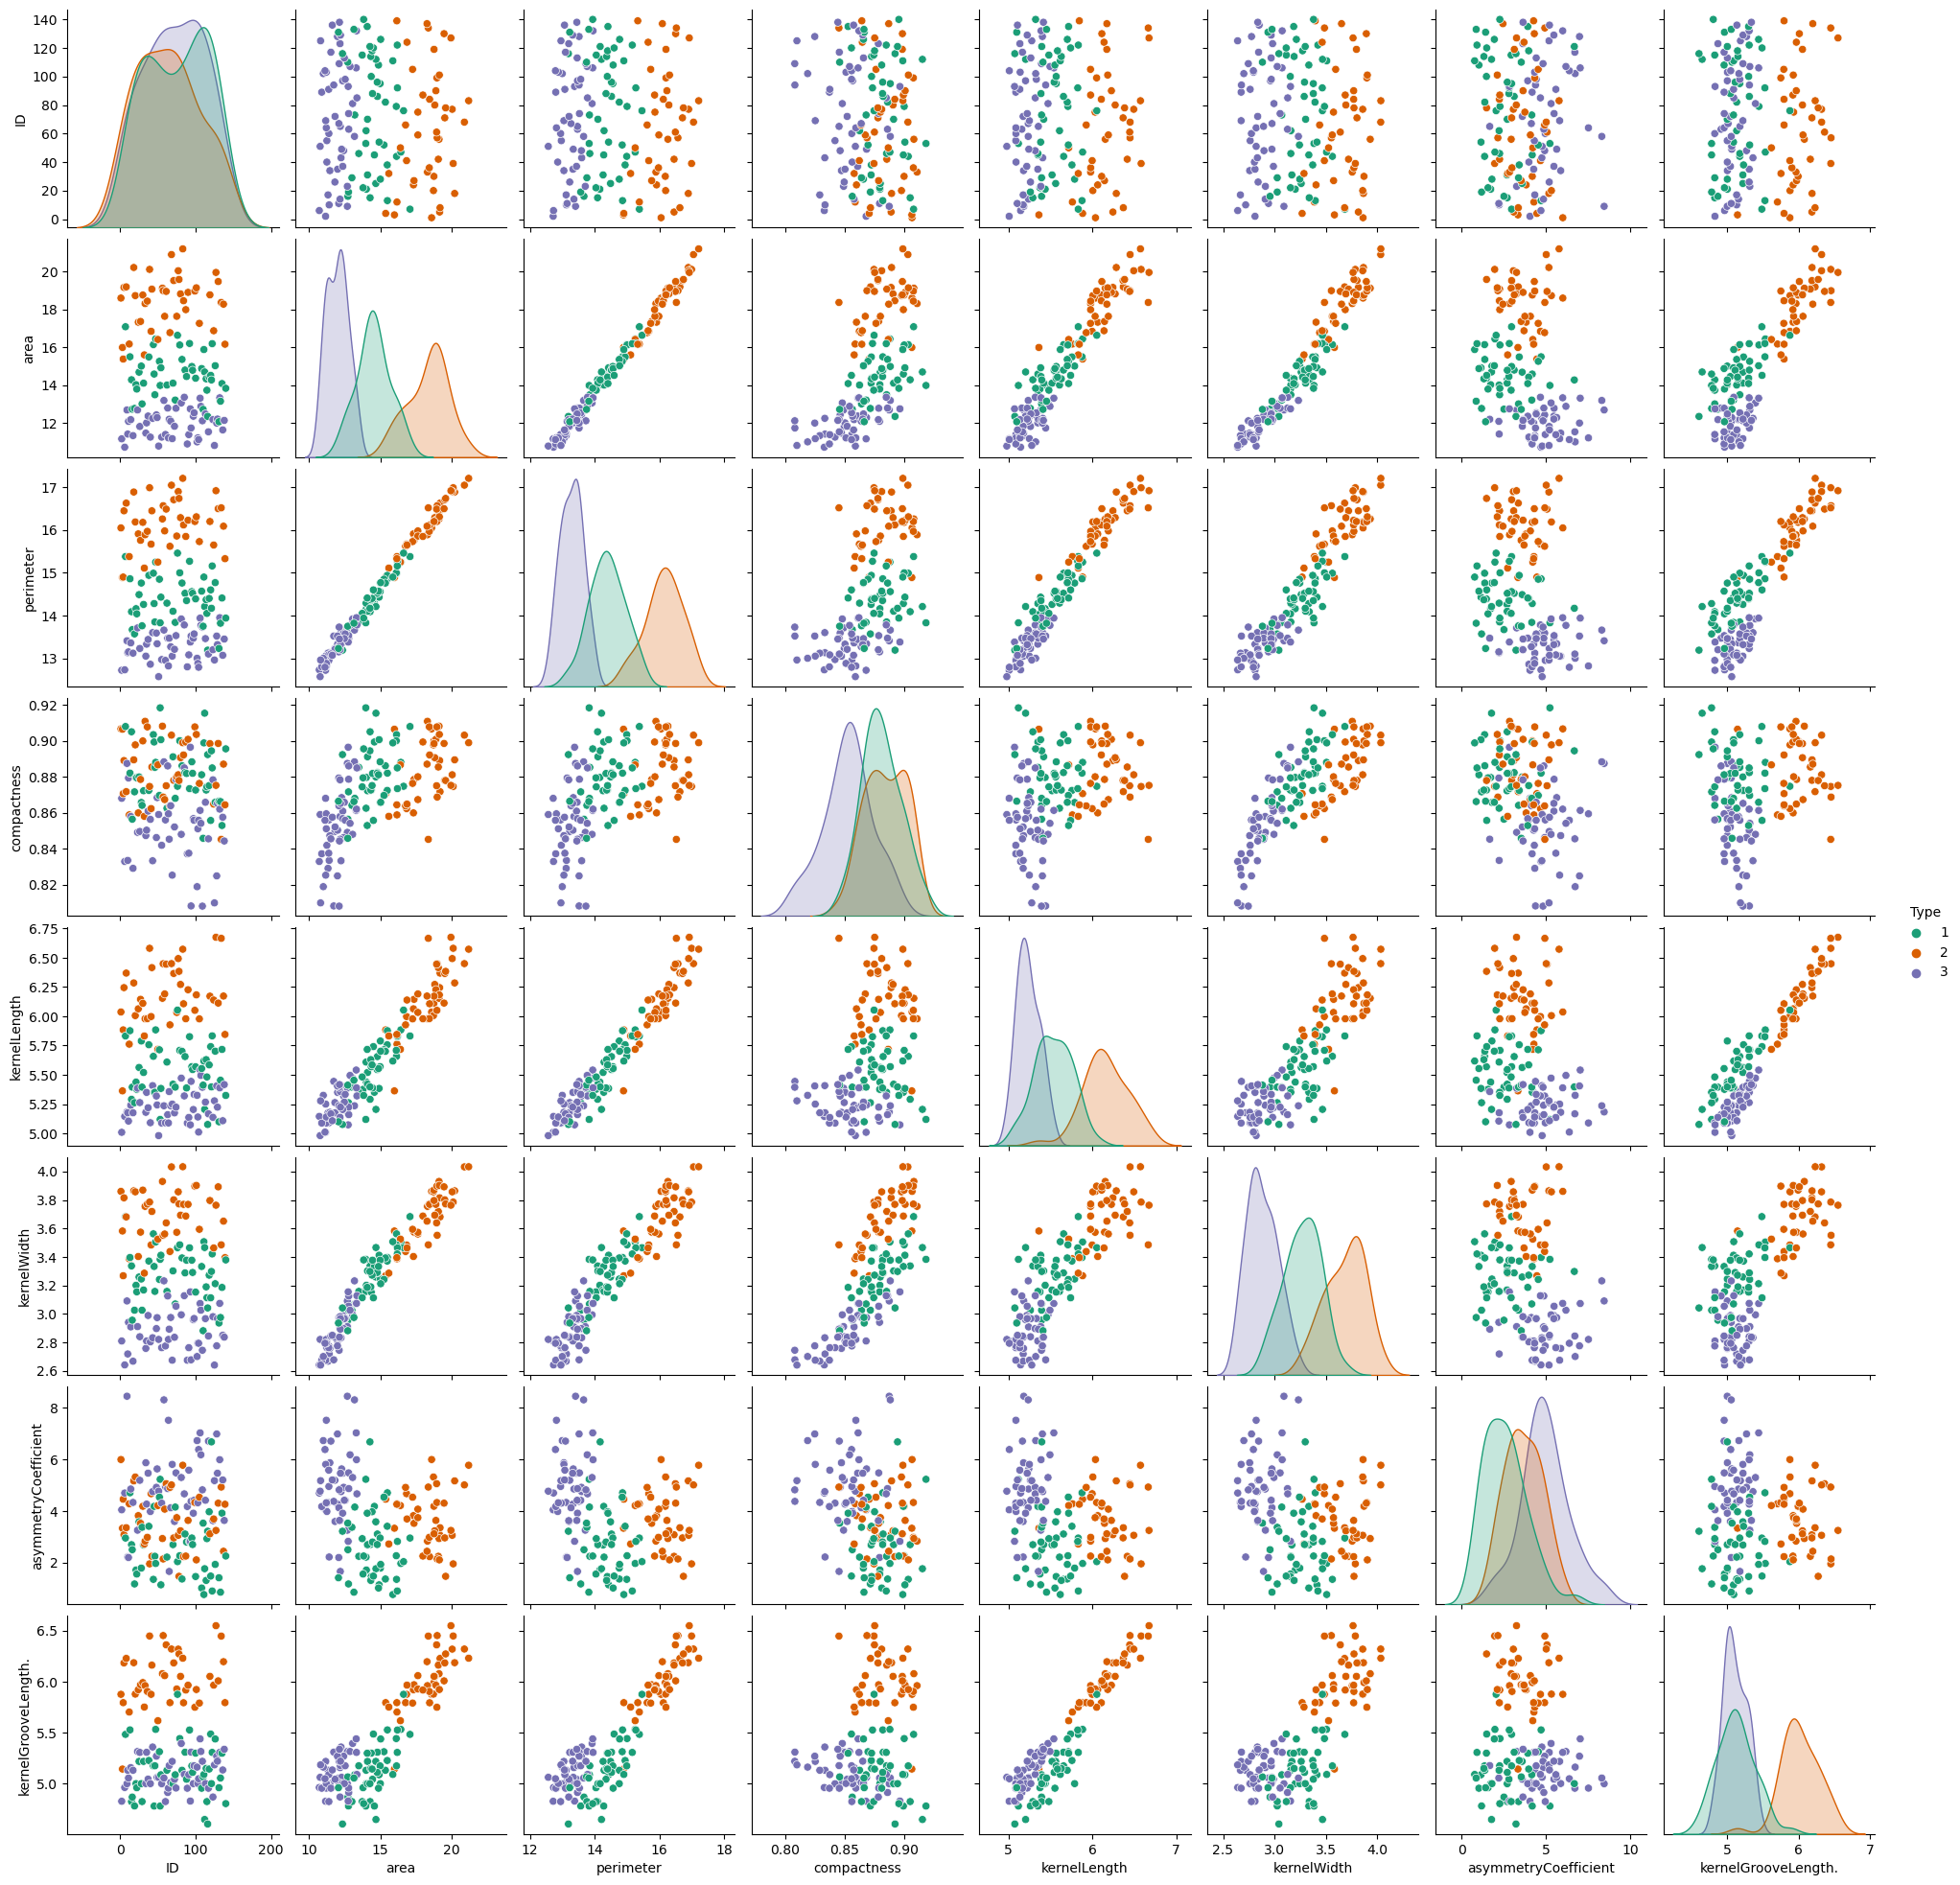

In [5]:
sns.pairplot(train, hue = "Type", palette = "Dark2")

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X = train.drop(["ID", "Type"], axis = 1)
y = train["Type"]

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [9]:
from sklearn.svm import SVC

In [10]:
svc_model = SVC()
# C: Penalty parameter of the error term high value: strict margin; low value: soft margin  
# gamma: how far the influence of a single training example reaches: Low: far; high: close

In [11]:
svc_model.fit(X_train, y_train)

SVC()

In [12]:
preds = svc_model.predict(X_test)

In [13]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [14]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           1       0.82      0.88      0.85        16
           2       1.00      0.81      0.90        16
           3       0.83      1.00      0.91        10

    accuracy                           0.88        42
   macro avg       0.89      0.90      0.88        42
weighted avg       0.89      0.88      0.88        42



In [15]:
print(confusion_matrix(y_test, preds))

[[14  0  2]
 [ 3 13  0]
 [ 0  0 10]]


In [16]:
print(accuracy_score(y_test, preds))

0.8809523809523809


Using Grid Search CV to furthur fine tune the parameters

In [17]:
from sklearn.model_selection import GridSearchCV

In [54]:
param_grid = {"C": [0.1, 1, 10, 100], "gamma": [1, 0.1, 0.01, 0.001], "kernel": ['rbf', 'poly', 'sigmoid', 'linear']}

In [55]:
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)

In [56]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 64 candidates, totalling 320 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.450 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.400 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.400 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.421 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.421 total time=   0.0s
[CV 1/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.950 total time=   0.0s
[CV 2/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.900 total time=   0.0s
[CV 3/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.850 total time=   0.0s
[CV 4/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.947 total time=   0.0s
[CV 5/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.895 total time=   0.0s
[CV 1/5] END ....C=0.1, gamma=1, kernel=sigmoid;, score=0.400 total time=   0.0s
[CV 2/5] END ....C=0.1, gamma=1, kernel=sigmoid

[CV 2/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.900 total time=   0.0s
[CV 3/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.800 total time=   0.0s
[CV 4/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.895 total time=   0.0s
[CV 5/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.895 total time=   0.0s
[CV 1/5] END ......C=1, gamma=0.01, kernel=poly;, score=0.950 total time=   0.0s
[CV 2/5] END ......C=1, gamma=0.01, kernel=poly;, score=0.900 total time=   0.0s
[CV 3/5] END ......C=1, gamma=0.01, kernel=poly;, score=0.950 total time=   0.0s
[CV 4/5] END ......C=1, gamma=0.01, kernel=poly;, score=0.947 total time=   0.0s
[CV 5/5] END ......C=1, gamma=0.01, kernel=poly;, score=0.895 total time=   0.0s
[CV 1/5] END ...C=1, gamma=0.01, kernel=sigmoid;, score=0.400 total time=   0.0s
[CV 2/5] END ...C=1, gamma=0.01, kernel=sigmoid;, score=0.400 total time=   0.0s
[CV 3/5] END ...C=1, gamma=0.01, kernel=sigmoid;, score=0.400 total time=   0.0s
[CV 4/5] END ...C=1, gamma=0

[CV 3/5] END .......C=100, gamma=1, kernel=poly;, score=0.850 total time=   0.0s
[CV 4/5] END .......C=100, gamma=1, kernel=poly;, score=0.947 total time=   0.0s
[CV 5/5] END .......C=100, gamma=1, kernel=poly;, score=0.895 total time=   0.0s
[CV 1/5] END ....C=100, gamma=1, kernel=sigmoid;, score=0.400 total time=   0.0s
[CV 2/5] END ....C=100, gamma=1, kernel=sigmoid;, score=0.400 total time=   0.0s
[CV 3/5] END ....C=100, gamma=1, kernel=sigmoid;, score=0.400 total time=   0.0s
[CV 4/5] END ....C=100, gamma=1, kernel=sigmoid;, score=0.421 total time=   0.0s
[CV 5/5] END ....C=100, gamma=1, kernel=sigmoid;, score=0.421 total time=   0.0s
[CV 1/5] END .....C=100, gamma=1, kernel=linear;, score=0.900 total time=   0.0s
[CV 2/5] END .....C=100, gamma=1, kernel=linear;, score=0.950 total time=   0.0s
[CV 3/5] END .....C=100, gamma=1, kernel=linear;, score=0.850 total time=   0.0s
[CV 4/5] END .....C=100, gamma=1, kernel=linear;, score=0.947 total time=   0.0s
[CV 5/5] END .....C=100, gam

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'poly', 'sigmoid', 'linear']},
             verbose=3)

In [57]:
grid.best_params_

{'C': 0.1, 'gamma': 1, 'kernel': 'linear'}

In [58]:
grid.best_estimator_

SVC(C=0.1, gamma=1, kernel='linear')

In [59]:
grid_preds = grid.predict(X_test)

In [60]:
print(confusion_matrix(y_test, grid_preds))

[[13  1  2]
 [ 1 15  0]
 [ 0  0 10]]


In [61]:
print(accuracy_score(y_test, grid_preds))

0.9047619047619048


In [62]:
print(classification_report(y_test, grid_preds))

              precision    recall  f1-score   support

           1       0.93      0.81      0.87        16
           2       0.94      0.94      0.94        16
           3       0.83      1.00      0.91        10

    accuracy                           0.90        42
   macro avg       0.90      0.92      0.90        42
weighted avg       0.91      0.90      0.90        42



Building the model

In [63]:
grid.fit(X, y)

Fitting 5 folds for each of 64 candidates, totalling 320 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.786 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.786 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.643 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.821 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.821 total time=   0.0s
[CV 1/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.964 total time=   0.0s
[CV 2/5] END .......C=0.1, gamma=1, kernel=poly;, score=1.000 total time=   0.0s
[CV 3/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.964 total time=   0.0s
[CV 4/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.929 total time=   0.0s
[CV 5/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.893 total time=   0.0s
[CV 1/5] END ....C=0.1, gamma=1, kernel=sigmoid;, score=0.357 total time=   0.0s
[CV 2/5] END ....C=0.1, gamma=1, kernel=sigmoid

[CV 4/5] END .......C=1, gamma=0.1, kernel=poly;, score=0.929 total time=   0.0s
[CV 5/5] END .......C=1, gamma=0.1, kernel=poly;, score=0.893 total time=   0.0s
[CV 1/5] END ....C=1, gamma=0.1, kernel=sigmoid;, score=0.357 total time=   0.0s
[CV 2/5] END ....C=1, gamma=0.1, kernel=sigmoid;, score=0.357 total time=   0.0s
[CV 3/5] END ....C=1, gamma=0.1, kernel=sigmoid;, score=0.357 total time=   0.0s
[CV 4/5] END ....C=1, gamma=0.1, kernel=sigmoid;, score=0.357 total time=   0.0s
[CV 5/5] END ....C=1, gamma=0.1, kernel=sigmoid;, score=0.357 total time=   0.0s
[CV 1/5] END .....C=1, gamma=0.1, kernel=linear;, score=0.893 total time=   0.0s
[CV 2/5] END .....C=1, gamma=0.1, kernel=linear;, score=0.964 total time=   0.0s
[CV 3/5] END .....C=1, gamma=0.1, kernel=linear;, score=0.893 total time=   0.0s
[CV 4/5] END .....C=1, gamma=0.1, kernel=linear;, score=0.929 total time=   0.0s
[CV 5/5] END .....C=1, gamma=0.1, kernel=linear;, score=0.929 total time=   0.0s
[CV 1/5] END .......C=1, gam

[CV 5/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.929 total time=   0.0s
[CV 1/5] END ....C=10, gamma=0.001, kernel=poly;, score=0.821 total time=   0.0s
[CV 2/5] END ....C=10, gamma=0.001, kernel=poly;, score=0.893 total time=   0.0s
[CV 3/5] END ....C=10, gamma=0.001, kernel=poly;, score=0.964 total time=   0.0s
[CV 4/5] END ....C=10, gamma=0.001, kernel=poly;, score=0.964 total time=   0.0s
[CV 5/5] END ....C=10, gamma=0.001, kernel=poly;, score=0.893 total time=   0.0s
[CV 1/5] END .C=10, gamma=0.001, kernel=sigmoid;, score=0.893 total time=   0.0s
[CV 2/5] END .C=10, gamma=0.001, kernel=sigmoid;, score=0.893 total time=   0.0s
[CV 3/5] END .C=10, gamma=0.001, kernel=sigmoid;, score=0.893 total time=   0.0s
[CV 4/5] END .C=10, gamma=0.001, kernel=sigmoid;, score=0.893 total time=   0.0s
[CV 5/5] END .C=10, gamma=0.001, kernel=sigmoid;, score=0.929 total time=   0.0s
[CV 1/5] END ..C=10, gamma=0.001, kernel=linear;, score=0.857 total time=   0.0s
[CV 2/5] END ..C=10, gamma=0

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'poly', 'sigmoid', 'linear']},
             verbose=3)

In [64]:
grid.best_params_

{'C': 100, 'gamma': 1, 'kernel': 'linear'}

In [65]:
grid.best_estimator_

SVC(C=100, gamma=1, kernel='linear')

In [66]:
final_grid_preds = grid.predict(test.drop("ID", axis = 1))

In [67]:
final_grid_preds

array([2, 3, 1, 1, 3, 2, 1, 2, 1, 2, 3, 1, 2, 2, 3, 3, 2, 2, 3, 1, 3, 1,
       3, 2, 3, 1, 3, 1, 2, 2, 2, 2, 2, 1, 3, 2, 2, 2, 2, 2, 3, 3, 3, 3,
       1, 2, 3, 1, 3, 2, 3, 1, 1, 3, 3, 1, 3, 2, 2, 1, 1, 1, 2, 2, 1, 1,
       2, 3, 2, 1], dtype=int64)

In [68]:
df = pd.DataFrame({"Type":final_grid_preds})
ID = test["ID"]

In [69]:
result = pd.concat([ID,df], axis=1, join='inner')
display(result)

,ID,Type
0,1,2
1,2,3
2,3,1
3,4,1
4,5,3
...,...,...
65,66,1
66,67,2
67,68,3
68,69,2


In [70]:
result.to_csv('results.csv', index=False)